In [1]:
import os
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Set environment variables to limit MKL threading and set the MKL layer
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_THREADING_LAYER"] = "GNU"
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
path = r"C:\Users\prajj\Desktop\Coding\python\ML Models\clustering\Mall_Customers.csv"
data = pd.read_csv(path)

# Display the first few rows of the dataset
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Select relevant features
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


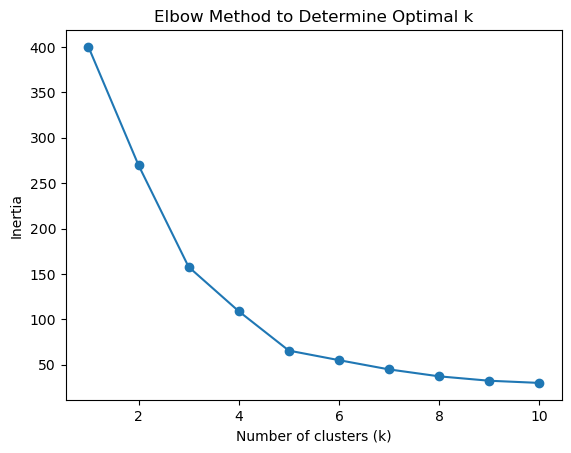

In [7]:
# Elbow method to find the optimal number of clusters (k)
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Explicitly set n_init
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the results of the Elbow Method
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


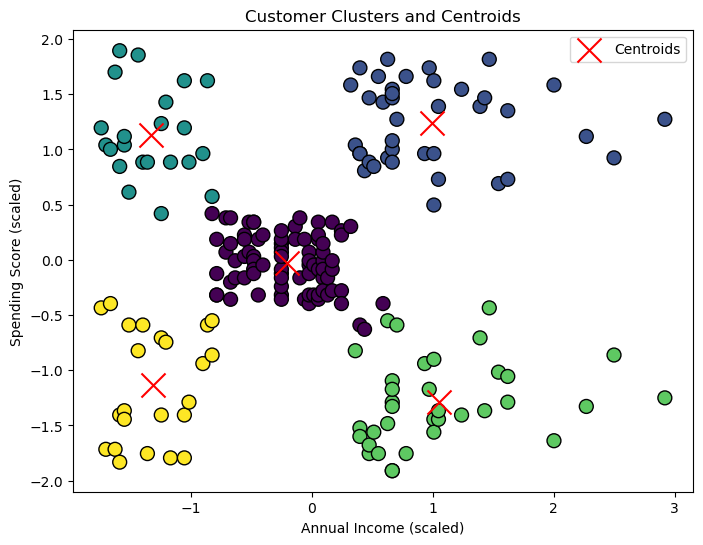

In [9]:
# Assuming k=5 from the elbow method
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title('Customer Clusters and Centroids')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()
